# Calculate the halo mass function with CCL
In this example, we will calculate the halo mass function for an example cosmology.

In [4]:
import numpy as np
import pylab as plt
import pyccl as ccl
%matplotlib inline

### Set up a Cosmology object
`Cosmology` objects contain the parameters and metadata needed as inputs to most functions. Each `Cosmology` object has a set of cosmological parameters attached to it. In this example, we will only use the parameters of a vanilla LCDM model, but simple extensions (like curvature, neutrino mass, and w0/wa) are also supported.

`Cosmology` objects also contain precomputed data (e.g. splines) to help speed-up certain calculations. As such, `Cosmology` objects are supposed to be immutable; you should create a new `Cosmology` object when you want to change the values of any cosmological parameters.

In [5]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)

### Halo mass function

With a cosmology in hand, we can begin performing some calculations. We will obtain the halo mass function at a given redshift. Notice that in its default configuration, CCL uses the Tinker2010 mass function. Other options are available in C, but the python version of CCL only uses Tinker2010.

In [6]:
z = 0.5
halo_mass = np.logspace(10, 15, 20) # Vector of halo masses between 1e10 and 1e15
a = 1./(1+z)
hmf = ccl.massfunc(cosmo, halo_mass, a, overdensity=200)

Let's now make a plot:

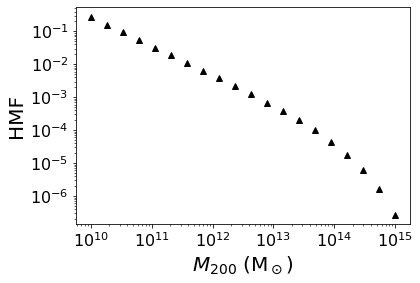

In [7]:
plt.plot(halo_mass, hmf, 'k^')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{200}$ (M$_\odot$)', fontsize=20)
plt.ylabel('HMF', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Let us now obtain the halo bias as well, as a function of mass, for the same redshift as above.

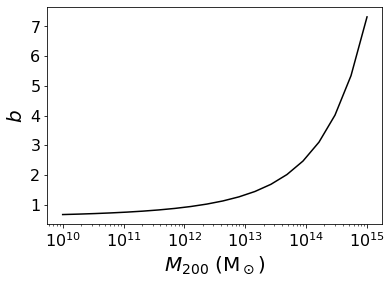

In [8]:
bhalo = ccl.halo_bias(cosmo, halo_mass, a, overdensity=200)

plt.plot(halo_mass, bhalo, 'k-')

plt.xscale('log')
plt.xlabel(r'$M_{200}$ (M$_\odot$)', fontsize=20)
plt.ylabel(r'$b$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()